In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing the dataset
df = pd.read_csv('netflix_data.csv', sep=',')

In [3]:
#Checking the first 5 rows of the dataset
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
#Checking for missing values
null_values = df.isnull().sum()
null_values

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [5]:
#Checking the data types of the columns
data_types = df.dtypes
data_types

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [6]:
#transforming the 'date_added' column to only year
df['date_added'] = pd.to_datetime(df['date_added'])
df['date_added'] = df['date_added'].dt.year

In [7]:
#Checking the unique values of the 'type' column
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

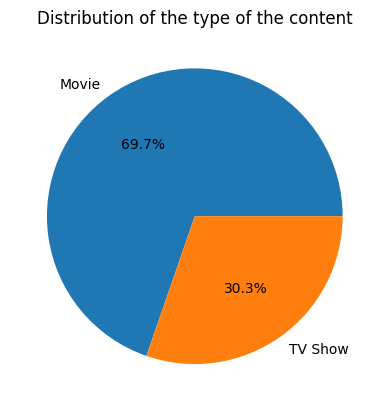

In [8]:
#Checking the distribution of the type of the content
plt.pie(df['type'].value_counts(), labels = df['type'].unique(), autopct='%1.1f%%')
plt.title('Distribution of the type of the content')
plt.show()

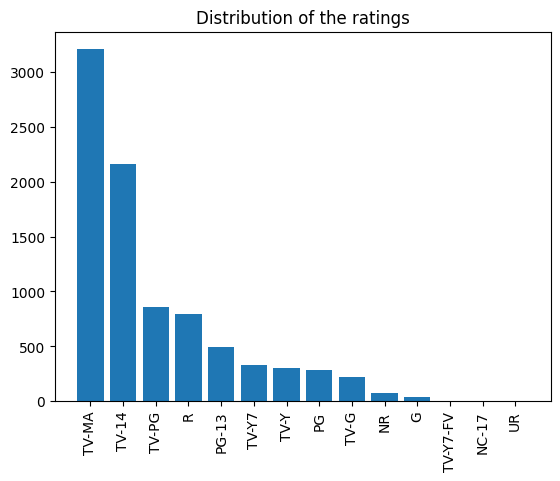

In [9]:
#Checking the distribution of the ratings
plt.bar(df['rating'].value_counts().index, df['rating'].value_counts().values)
plt.xticks(rotation=90)
plt.title('Distribution of the ratings')
plt.show()

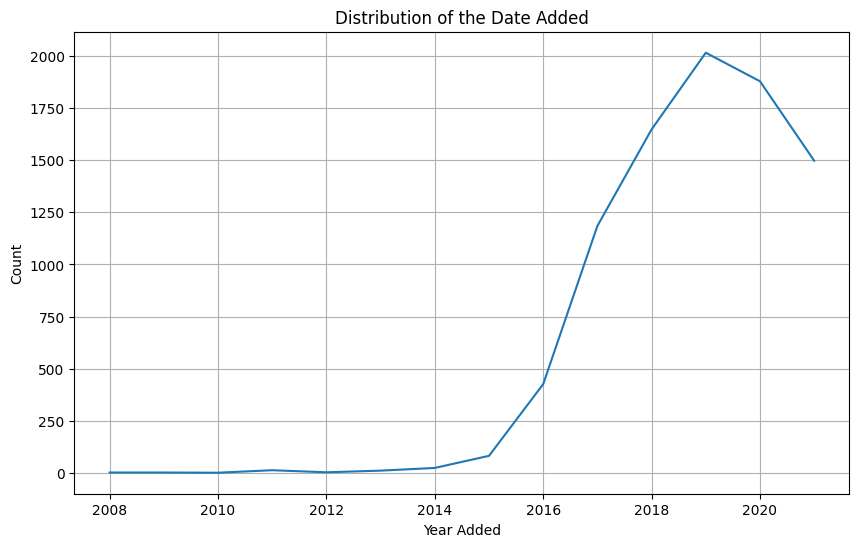

In [10]:
plt.figure(figsize=(10, 6))

#Checking the distribution of the date added
df['date_added'].value_counts().sort_index().plot(kind='line')

#Adding the title and labels
plt.title('Distribution of the Date Added')
plt.xlabel('Year Added')
plt.ylabel('Count')

#Adding the grid
plt.grid(True)
plt.show()

In [11]:
#filtering the data
filtered_df = df[df['country'] != 'Not Given']

#Checking the top 10 countries add content
top_countries = filtered_df['country'].value_counts().head(10).sort_values(ascending=True)

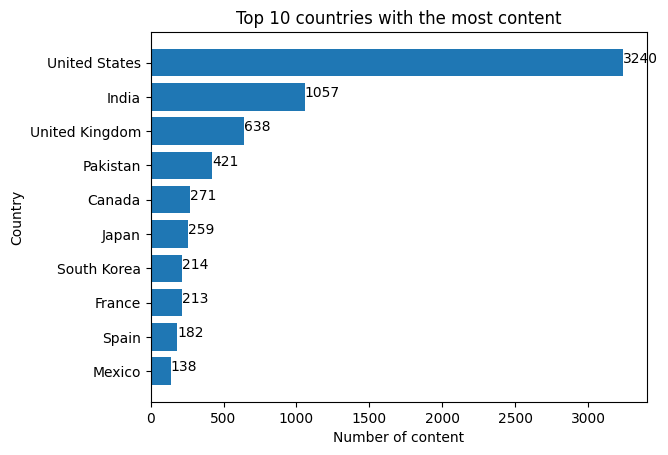

In [12]:
#create the bar chart
plt.barh(top_countries.index, top_countries)
plt.title('Top 10 countries with the most content')
plt.xlabel('Number of content')
plt.ylabel('Country')

# Adding the values on top of the bars
for index, value in enumerate(top_countries):
    plt.text(value, index, str(value))

plt.show()

In [18]:
#filtering the data
df_movies = df[df['type'] == 'Movie']

# extract the duration of the movies
df_movies.loc[:, 'duration'] = df_movies['duration'].str.replace(' min', '').astype(int)


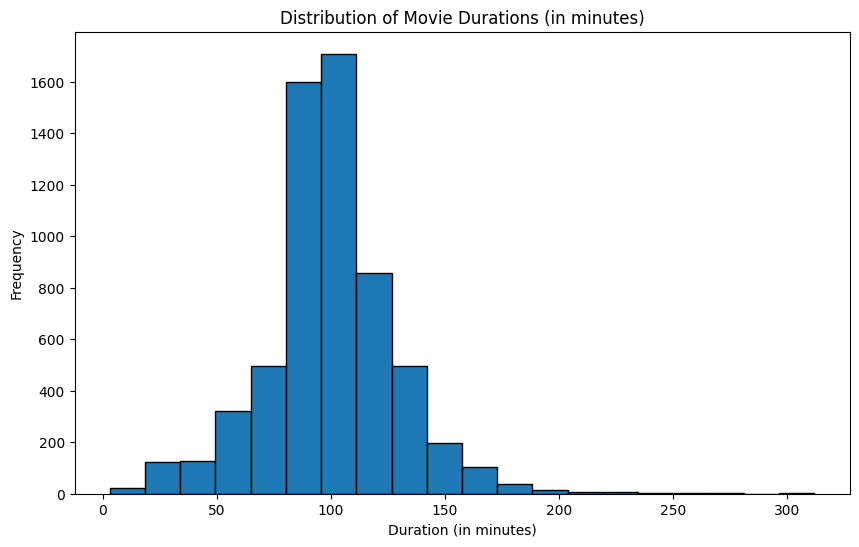

In [15]:
#create the graph
plt.figure(figsize=(10, 6))
plt.hist(df_movies['duration'], bins=20, edgecolor='black')
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (in minutes)')
plt.ylabel('Frequency')

plt.show()

In [16]:
#separete the genres by comma and explode the column
genre_counts = df['listed_in'].str.split(',').explode().value_counts().head(10).sort_values(ascending=True)
genre_counts

listed_in
 Romantic Movies           613
 TV Dramas                 695
 Independent Movies        736
International TV Shows     773
 Dramas                    827
Documentaries              829
Action & Adventure         859
Comedies                  1210
Dramas                    1599
 International Movies     2624
Name: count, dtype: int64

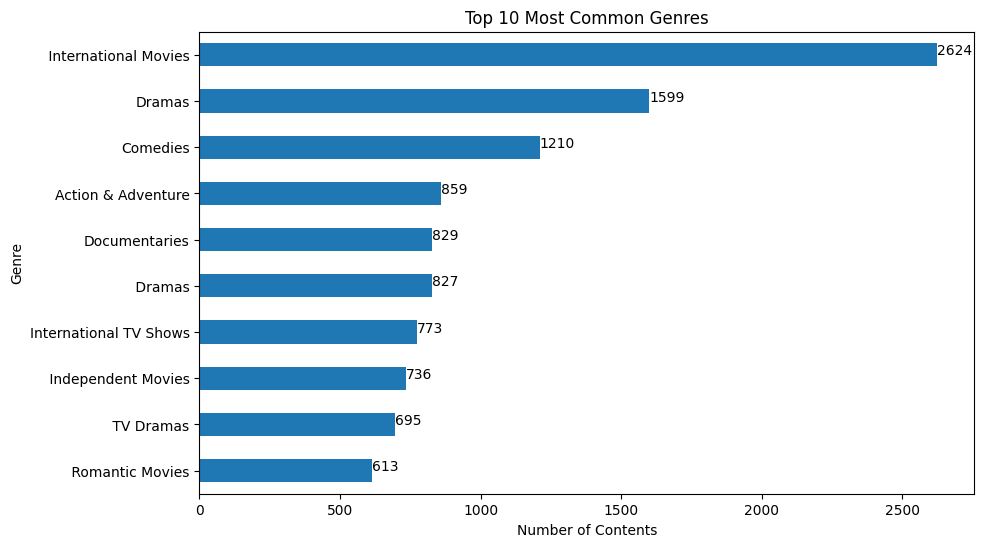

In [17]:
#create a bar chart with the top 10 genres
plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(kind='barh')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Number of Contents')
plt.ylabel('Genre')

#aggregate the values on top of the bars
for index, value in enumerate(genre_counts.head(10)):
    plt.text(value, index, str(value))

plt.show()